# **Movie Genre Classification using TF-IDF and Naive Bayes** #


#  here we are importing  library #

In [1]:
import seaborn as sns #a widely popular data visualization library that is commonly used for data science and machine learning tasks
import re
import pandas as p #Pandas is one of the tools in Machine Learning which is used for data cleaning and analysis. It has features which are used for exploring, cleaning, transforming and visualizing from data.
from sklearn.metrics import accuracy_score, classification_report #The sklearn. metrics module implements several loss, score, and utility functions to measure classification performance.
#The classification report visualizer displays the precision, recall, F1, and support scores for the model.
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import nltk #a platform used for building Python programs that work with human language data for applying in statistical natural language processing (NLP).
import matplotlib.pyplot as plot #Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.
import string #The string module is a built-in Python module that provides various string-related constants, functions, and classes. It includes a set of string constants, such as ASCII letters, digits, and punctuation marks, as well as the Template class for string substitution using templates.


# Load Dataset #

In [2]:
trai_pat = "/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt"
trai_dat = p.read_csv(trai_pat, sep=':::', names=['Title', 'Genre', 'Description'], engine='python') #Pandas read_csv() function imports a CSV file to DataFrame format.


In [5]:
# Load the test data
tes_pat = "/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data.txt"
tes_dat = p.read_csv(tes_pat, sep=':::', names=['Id', 'Title', 'Description'], engine='python') #here we are separating ':::'
tes_dat.head() #The head() function is primarily used to view the first few rows of a dataset.


,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


#  APPLY the  Visualization ,EDA  
#Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.
#Data visualization helps machine learning analysts to better understand and analyze complex data sets by presenting them in an easily
understandable format. Data visualization is an essential step in data preparation and analysis as it helps to identify outliers, trends, and patterns in the data that may be missed by other forms of analysis.

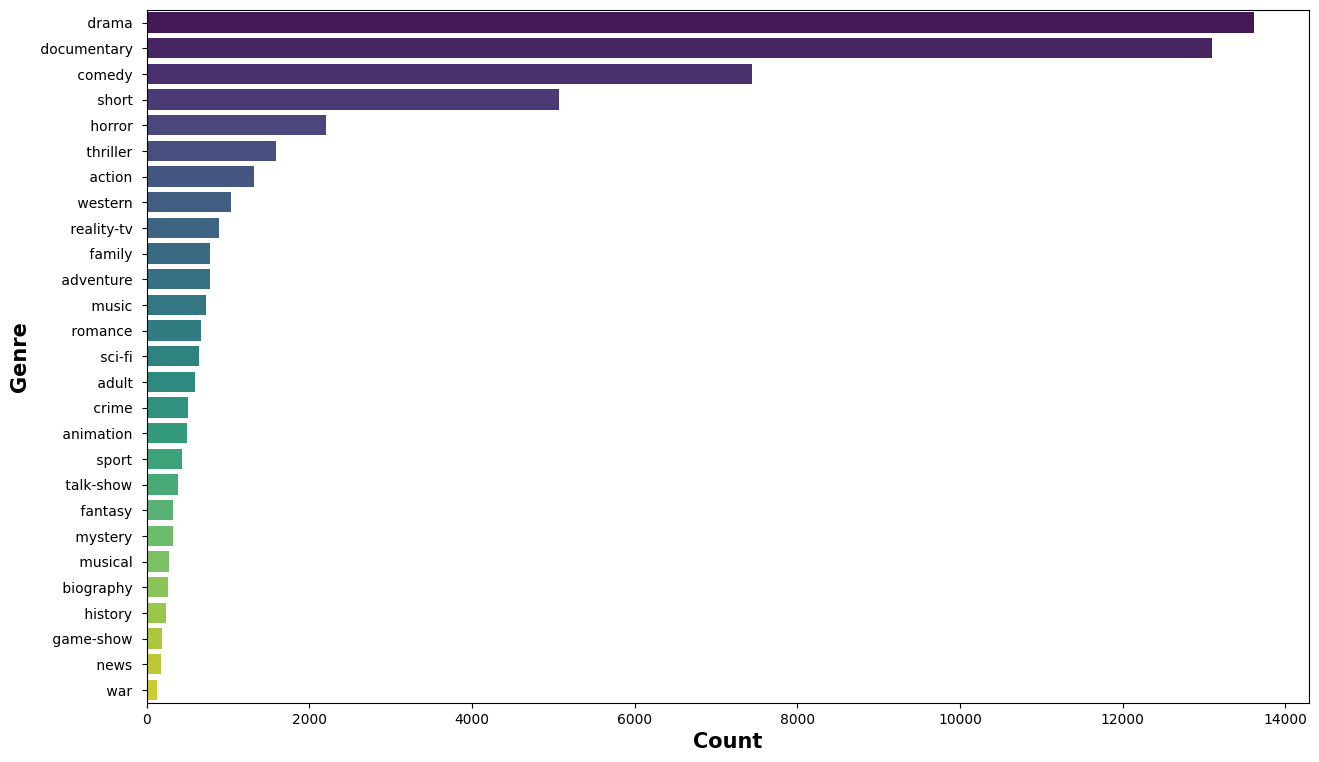

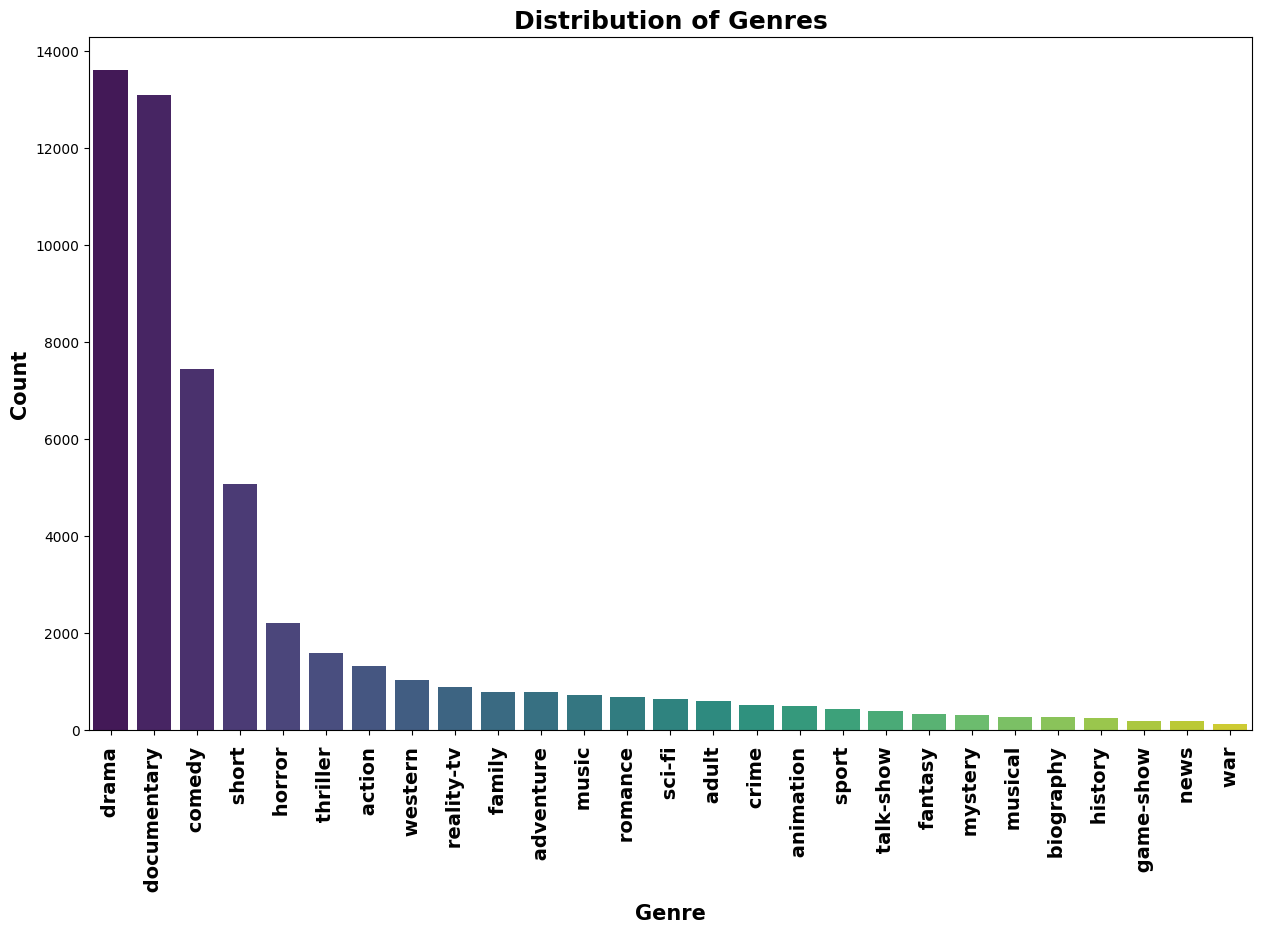

In [6]:
# Plot the distribution of genres in the training data
plot.figure(figsize=(15, 9))
sns.countplot(data=trai_dat, y='Genre', order=trai_dat['Genre'].value_counts().index, palette='viridis')
plot.xlabel('Count', fontsize=15, fontweight='bold') #It is present in matplotlib,used for labeling of x axis
plot.ylabel('Genre', fontsize=15, fontweight='bold') #It is present in matplotlib,used for labeling of y axis

# Plot the distribution of genres using a bar plot
plot.figure(figsize=(15, 9))
counts = trai_dat['Genre'].value_counts()
sns.barplot(x=counts.index, y=counts, palette='viridis') #A bar plot or bar chart is a graph that represents the category of data with rectangular bars with lengths and heights that is proportional to the values which they represent. The bar plots can be plotted horizontally or vertically.
plot.xlabel('Genre', fontsize=15, fontweight='bold')
plot.ylabel('Count', fontsize=15, fontweight='bold')
plot.title('Distribution of Genres', fontsize=18, fontweight='bold')
plot.xticks(rotation=90, fontsize=14, fontweight='bold') #present in matplotlib.pyplot.xticks()
plot.show()


# Apply  Text Cleaning and Data Preprocessing on dataset  
#Data preprocessing in Machine Learning refers to the technique of preparing (cleaning and organizing) the raw data to make it suitable for a building and training Machine Learning models.matlab prepare data for apply the model.
#Text cleaning here refers to the process of removing or transforming certain parts of the text so that the text becomes more easily understandable for NLP models that are learning the text.

In [7]:

#stemmer- removing base form of words by removing affixes from it ex-earting,eats,eaten is eat                    
Stemmer = LancasterStemmer() #It was developed at Lancaster University and it is another very common stemming algorithms.nltk has it
stop_wor = set(stopwords.words('english')) #The process of converting data to something a computer can understand is referred to as pre-processing. One of the major forms of pre-processing is to filter out useless data. In natural language processing, useless words (data), are referred to as stop words.

# Define the clean_text function
def clea_tex(text):
    text = text.lower()  # Lowercase all characters
    text = re.sub(r'@\S+', '', text)  # Remove Twitter handles
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)  # Keep only characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  # Keep words with length > 1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')  # Remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()  # Remove repeated/leading/trailing spaces
    return text

# clean_text function to the 'Description' column in the training and test data
trai_dat['Text_cleaning'] = trai_dat['Description'].apply(clea_tex)
tes_dat['Text_cleaning'] = tes_dat['Description'].apply(clea_tex)


# Apply Data Preprocessing 
#we are still doing preprocessing

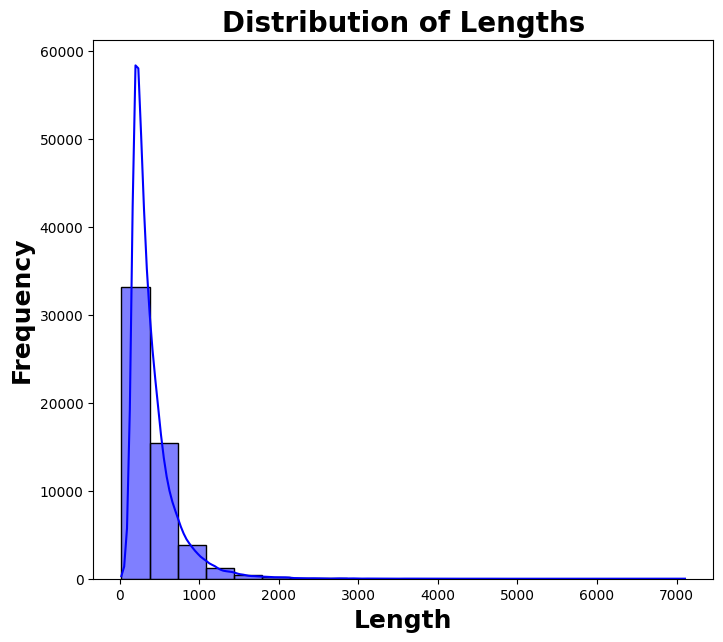

In [8]:
# Calculate the length of cleaned text
trai_dat['length_Text_cleaning'] = trai_dat['Text_cleaning'].apply(len)
# Visualize the distribution of text lengths
plot.figure(figsize=(8, 7))
sns.histplot(data=trai_dat, x='length_Text_cleaning', bins=20, kde=True, color='blue') #Histograms group the data in bins and is the fastest way to get idea about the distribution of each attribute in dataset. The following are some of the characteristics of histograms It provides us a count of the number of observations in each bin created for visualization. From the shape of the bin, we can easily observe the distribution i.e. weather it is Gaussian, skewed or exponential. Histograms also help us to see possible outliers.
plot.xlabel('Length', fontsize=18, fontweight='bold')
plot.ylabel('Frequency', fontsize=18, fontweight='bold')
plot.title('Distribution of Lengths', fontsize=20, fontweight='bold')
plot.show()


#   Apply Text Vectorization Using TF-IDF method#
#In Machine Learning, vectorization is a step in feature extraction. The idea is to get some distinct features out of the text for the model to train on, by converting text to numerical vectors.

In [9]:
# Initialize the TF-IDF vectorizer
vectorizer_tfidf = TfidfVectorizer() #TF-IDF will transform the text into meaningful representation of integers or numbers which is used to fit machine learning algorithm for predictions. TF-IDF Vectorizer is a measure of originality of a word by comparing the number of times a word appears in document with the number of documents the word appears in.

# Fit and transform the training data
x_trai = vectorizer_tfidf.fit_transform(trai_dat['Text_cleaning'])

# Transform the test data
x_tes = vectorizer_tfidf.transform(tes_dat['Text_cleaning'])


#  here Splitting the Dataset and Trainning  a Model (Naive Bayes) #
#it is a probabilistic classifier, which means it predicts on the basis of the probability of an object.
#Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.
It is mainly used in text classification that includes a high-dimensional training dataset.

In [10]:
# Split the data into training and validation sets
#Validation data set: We use this set to provide an unbiased evaluation of the model during the training phase.
X = x_trai
y = trai_dat['Genre']
x_trai, x_val, y_trai, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Multinomial Naive Bayes classifier
#Multinomial Naive Bayes (MNB) is a popular machine learning algorithm for text classification problems in Natural Language Processing (NLP). It is particularly useful for problems that involve text data with discrete features such as word frequency counts
classifier = MultinomialNB()
classifier.fit(x_trai, y_trai)

# Make predictions on the validation set
y_pred = classifier.predict(x_val)

# Evaluate the performance of the model
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(y_val, y_pred))


Validation Accuracy: 0.44526422576777647
               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.00      0.00      0.00       112
   adventure        0.00      0.00      0.00       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.61      0.04      0.07      1443
       crime        0.00      0.00      0.00       107
 documentary        0.54      0.90      0.67      2659
       drama        0.38      0.88      0.53      2697
      family        0.00      0.00      0.00       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.00      0.00      0.00        40
     history        0.00      0.00      0.00        45
      horror        0.00      0.00      0.00       431
       music        0.00      0.00      0.00       144
     musical        0.00      0.00      0.00        50
     mystery        0.0

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 # Now  Check the Predictions of Test Data #

In [11]:
# Use the trained model to make predictions on the test data
X_test_predictions = classifier.predict(x_tes)
tes_dat['Predicted_Genre'] = X_test_predictions

In [12]:
# Save the test_data DataFrame with predicted genres to a CSV file
tes_dat.to_csv('predicted_genres.csv', index=False)

# Display the 'test_data' DataFrame with predicted genres
print(tes_dat)


          Id                             Title  \
0          1             Edgar's Lunch (1998)    
1          2         La guerra de papá (1977)    
2          3      Off the Beaten Track (2010)    
3          4           Meu Amigo Hindu (2015)    
4          5                Er nu zhai (1955)    
...      ...                               ...   
54195  54196   "Tales of Light & Dark" (2013)    
54196  54197      Der letzte Mohikaner (1965)    
54197  54198              Oliver Twink (2007)    
54198  54199                Slipstream (1973)    
54199  54200        Curitiba Zero Grau (2010)    

                                             Description  \
0       L.R. Brane loves his life - his car, his apar...   
1       Spain, March 1964: Quico is a very naughty ch...   
2       One year in the life of Albin and his family ...   
3       His father has died, he hasn't spoken with hi...   
4       Before he was known internationally as a mart...   
...                                    